In [12]:
library(tidyverse)
tree_data <- read_csv("Sx.htdata.csv")
 
library(repr)
sxData |>
filter(PROV %in% c(34, 40, 63)) |>
select(PROV, P_Latitude, P_Longitude, P_Elevation) |>
unique()

sxData <- tree_data |>
mutate(
    TX_MAP = S_MAP -P_MAP,
    TX_MSP = S_MSP -P_MSP,
    TX_MCMT = S_MCMT - P_MCMT,
    TX_MAT = S_MAT - P_MAT,
    TX_Lat = S_Latitude - P_Latitude,
    TX_Long = S_Longitude - P_Longitude,
    TX_Elev = S_Elevation - P_Elevation
) 
head(sxData)

Rows: 3240 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): SITE
dbl (19): PROV, BLOCK, TREE, S_MAT, S_MCMT, S_MAP, S_MSP, S_Latitude, S_Long...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


PROV,P_Latitude,P_Longitude,P_Elevation
<dbl>,<dbl>,<dbl>,<dbl>
40,54.69117,-127.4027,1005
34,59.18291,-129.7254,792
63,50.07538,-115.0271,1280


SITE,PROV,BLOCK,TREE,S_MAT,S_MCMT,S_MAP,S_MSP,S_Latitude,S_Longitude,⋯,P_Longitude,Height,live,TX_MAP,TX_MSP,TX_MCMT,TX_MAT,TX_Lat,TX_Long,TX_Elev
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MID,1,4,6,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,853.3361,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92
MID,1,3,4,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,827.0951,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92
MID,1,3,9,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,804.8595,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92
MID,1,4,9,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,745.6832,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92
MID,1,4,5,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,832.1914,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92
MID,1,4,1,1.9,-12.9,565,247,54.19948,-125.002,⋯,-124.057,838.4129,1,-71,-184,5.4,3.1,-4.462839,-0.9450471,-92


In [3]:
model.1 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) +
              S_MAP + I(S_MAP^2) +
              I(TX_Lat^2) +
              TX_Long,
              data = sxData)
summary(model.1)


Call:
lm(formula = Height ~ P_MCMT + I(P_MCMT^2) + S_MAP + I(S_MAP^2) + 
    I(TX_Lat^2) + TX_Long, data = sxData)

Residuals:
    Min      1Q  Median      3Q     Max 
-489.79  -79.62    1.77   82.04  465.88 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.149e+03  1.452e+02  -49.23   <2e-16 ***
P_MCMT      -3.385e+01  9.523e-01  -35.54   <2e-16 ***
I(P_MCMT^2) -1.021e+00  4.135e-02  -24.69   <2e-16 ***
S_MAP        2.322e+01  5.093e-01   45.60   <2e-16 ***
I(S_MAP^2)  -1.690e-02  4.390e-04  -38.50   <2e-16 ***
I(TX_Lat^2) -1.236e+00  4.993e-02  -24.75   <2e-16 ***
TX_Long     -5.946e+00  4.405e-01  -13.50   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 128.8 on 3233 degrees of freedom
Multiple R-squared:  0.871,	Adjusted R-squared:  0.8708 
F-statistic:  3638 on 6 and 3233 DF,  p-value: < 2.2e-16


In [11]:
# select point 12 34 40

fcData <- read_csv("CD-12.csv") |> # the climate BC data
transmute(S_MCMT = MCMT, # changing the variable names into C_...
         S_MAT = MAT,
         S_MAP = MAP,
         S_MSP = MSP,
         S_Lat = Lat,
         S_Long = long,
         S_Elev = elev,
         period = period) 

#nearest to m: 40,  s: 63, n: 34 (PROV)
sxData2 <- subset(sxData, PROV %in% c(12, 34, 40, 63))
sxData2 <- unique(subset(sxData2, select = c(PROV, P_MAT, P_MCMT, P_MAP, P_MSP, P_Latitude, P_Longitude, P_Elevation)))
# now sxData2 only contains the PROV, P_MAT, P_MCMT, P_MAP, P_MSP, P_Latitude, P_Longitude, P_Elevation columns
# with the values of those in PROV 12, 34, 4O, 63

fcdat2 <- merge(fcData, sxData2)
# merge the climate data with the provenance data

head(fcdat2) # you can see now it has S_... and P_... datas

# then we add the TX values into the fcdat2
fcdat2 <- fcdat2|>
mutate(
    TX_MAP = S_MAP -P_MAP,
    TX_MSP = S_MSP -P_MSP,
    TX_MCMT = S_MCMT - P_MCMT,
    TX_MAT = S_MAT - P_MAT,
    TX_Lat = S_Lat - P_Latitude,
    TX_Long = S_Long- P_Longitude,
    TX_Elev = S_Elev - P_Elevation)|>
# if you edit the excel than you don't need this step
mutate(Climate = factor(period, # I mutate the period column into CLimate column so that it's easier to make a graph
                        levels = c("Normal_1991_2020.nrm", "8GCMs_ensemble_ssp126_2071-2100.gcm", "8GCMs_ensemble_ssp585_2071-2100.gcm"), 
                        # the orginal variable names
                        labels = c(0, 10, 20))) |> # the new varaible names
select(-period) # delete the original one

pred_height <- predict(model.1, fcdat2)
pred_table <- tibble (fcdat2$PROV, fcdat2$Climate, pred_height) |> # combone the column PROV, Climate in fcdat2, and predicted height(pred_height)
transmute(PROV = fcdat2$PROV, 
          Climate = fcdat2$Climate, 
          height = pred_height) # change their name so that it's more clear

pred_table

Rows: 3 Columns: 269
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): period
dbl (268): Lat, long, elev, MAT, MWMT, MCMT, TD, MAP, MSP, AHM, SHM, DD_0, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,S_MCMT,S_MAT,S_MAP,S_MSP,S_Lat,S_Long,S_Elev,period,PROV,P_MAT,P_MCMT,P_MAP,P_MSP,P_Latitude,P_Longitude,P_Elevation
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-7.1,4.9,546,183,51.40283,-117.0365,945,Normal_1991_2020.nrm,12,3.6,-10.0,682,203,51.40283,-117.0365,945
2,-7.9,6.1,619,195,51.40283,-117.0365,945,8GCMs_ensemble_ssp126_2071-2100.gcm,12,3.6,-10.0,682,203,51.40283,-117.0365,945
3,-5.5,8.9,648,188,51.40283,-117.0365,945,8GCMs_ensemble_ssp585_2071-2100.gcm,12,3.6,-10.0,682,203,51.40283,-117.0365,945
4,-7.1,4.9,546,183,51.40283,-117.0365,945,Normal_1991_2020.nrm,40,1.6,-9.3,723,230,54.69117,-127.4027,1005
5,-7.9,6.1,619,195,51.40283,-117.0365,945,8GCMs_ensemble_ssp126_2071-2100.gcm,40,1.6,-9.3,723,230,54.69117,-127.4027,1005
6,-5.5,8.9,648,188,51.40283,-117.0365,945,8GCMs_ensemble_ssp585_2071-2100.gcm,40,1.6,-9.3,723,230,54.69117,-127.4027,1005


PROV,Climate,height
<dbl>,<fct>,<dbl>
12,0,729.5963
12,10,987.7169
12,20,1040.2671
40,0,644.6934
40,10,902.8140
40,20,955.3642
34,0,622.5986
34,10,880.7192
34,20,933.2694


PROV,Climate,height
<dbl>,<dbl>,<dbl>
12,1,729.5963
12,2,987.7169
12,3,1040.2671
40,1,644.6934
40,2,902.8140
40,3,955.3642
34,1,622.5986
34,2,880.7192
34,3,933.2694


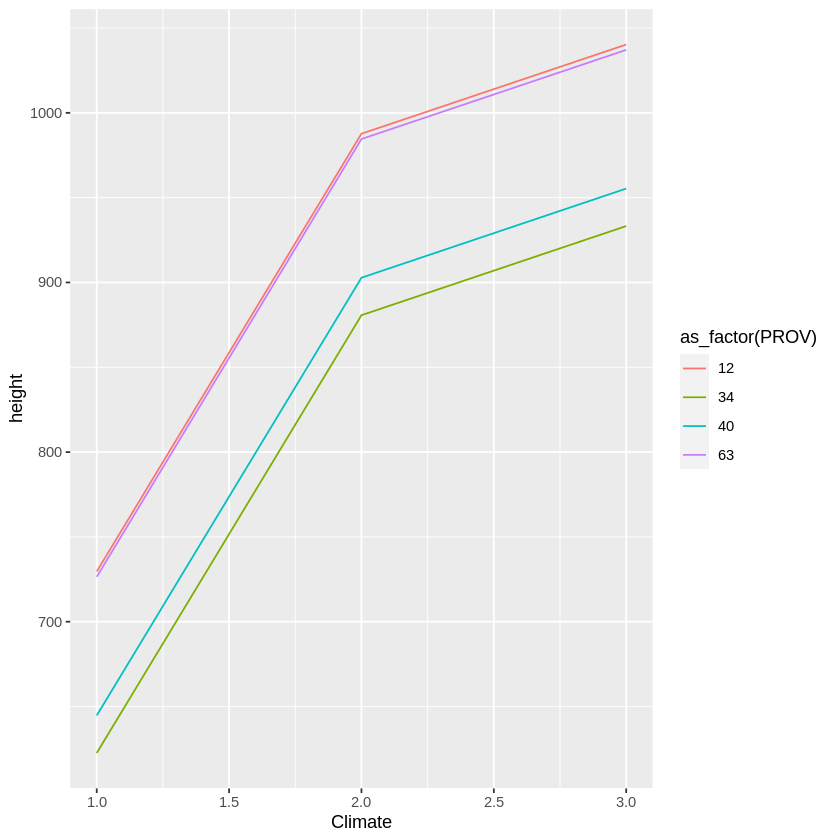

In [17]:
pred_table$Climate <- as.numeric(pred_table$Climate) # if you edit excel you also don't need this
pred_table

pred_table|>
ggplot(aes(x=Climate, y=height, color=as_factor(PROV)))+
geom_line() 